# MTH 335 Exam 1 Extra Credit
### Write a computer function to find zeros using the secant method.
The secant method finds zeros by calculating the intersection of a secant line with the $x$-axis. At the start of the algorithm, the secant line will be between $f(x_0)$ and $f(x_1)$. The $x$-axis intersection can then be calculated iteratively as follows (taking $x_n$ to mean $x_1$ on the first iteration):  

$$
x_{n+1} = x_n - \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} \cdot f(x_n)
$$

In [366]:
using Plots

## Secant Method Function ${\tt sm}$
The following is a secant method function definition.  
It will accept an initial $x_0$ and $x_1$, as well as a function and an optional integer argument that may denote a maximum number of iterations for the algorithm.

In [367]:
# secant method zero finder
function sm(x0::Float64, x1::Float64, f, max_iter::Int64 = 10)
    # current and next x
    current = x0
    next = x1
    intersection = 0 # line intersection with x-axis
    
    # store intersections
    xArr = []
    
    # finding intersection
    iterations = 0
    
    while(iterations < max_iter)
        intersection = next - ( next - current )/( f(next) - f(current) ) * f(next)

        # check for NaN
        isnan(intersection) ? break :
        
        # save intersection
        push!(xArr, intersection)
        
        # set next x's
        current = next
        next = intersection
        
        
        iterations += 1
    end
    
    return xArr # return intersections
end

sm (generic function with 6 methods)

Now for a simple test of the secant method function; it seems to run well.

In [368]:
# sm function test

f(x) = x^2 - 4
sm(-3,-1,f) # looking for -2

8-element Array{Any,1}:
 -1.75   
 -2.09091
 -1.99408
 -1.99987
 -2.0    
 -2.0    
 -2.0    
 -2.0    

Listing these duplicate intersection can be prevented if need be; the algorithm will stop when it encounters a ${\tt NaN}$, which is seen in this test.

## Find zeros for the following functions with the given $x$'s to start
We are tasked with finding the zeros of the following functions:

### Function 1: 
$ f(x) = x^5 - x - 1 $  

$x_0,x_1 = (0.9,0.8)$  
and  
$x_0,x_1 = (0.5,0.6)$

### Function 2: 
$ f(x) = e^x - x^4 $  

$x_0,x_1 = (7.9,8.0)$

### Function 3 (Newton Baffler): 
Let $m=1$, $b=\frac{1}{2}$

$
f(x) = \left\{
        \begin{array}{ll}
            2mx & \quad -b < x < b \\
            2mb + m(x-b)& \quad x > b \\
            -2mb + m(x+b) & \quad x < -b
        \end{array}
    \right.
$


$x_0,x_1 = (-1,\frac{3}{4})$

<hr>

## Function 1: 
$ f(x) = x^5 - x - 1 $  

$x_0,x_1 = (0.9,0.8)$  
and  
$x_0,x_1 = (0.5,0.6)$

Plotted below:

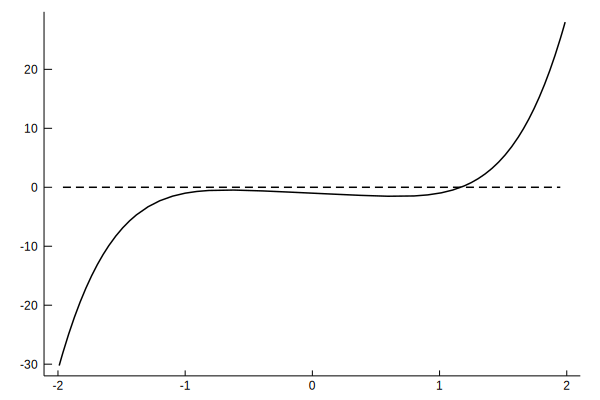

In [375]:
f(x) = x^5 - x - 1
bound = 2
plot(f,-bound,bound,label="",color="black",lw=1.5,grid=false)
plot!(zero,-bound,bound,label="",color="black",lw=1.5,grid=false,linestyle=:dash)

### Finding zeros using ${\tt sm}$ function:

In [376]:
ans1 = sm(0.9,0.8,f,30)
ans2 = sm(0.5,0.6,f,30)
answers = [ans1,ans2]

println("Starting from 0.9, 0.8 \n then from 0.5, 0.6:\n")
for i in answers
    println(i, "\n\titerations: ", length(i),"\n\n")
end

println("Evaluating function at both zeros found:")
println("\n", f(ans1[end]), ", ", f(ans2[end]))

Starting from 0.9, 0.8 
 then from 0.5, 0.6:

Any[1.70432, 0.901267, 0.982092, 1.34476, 1.10624, 1.14909, 1.16963, 1.16722, 1.1673, 1.1673, 1.1673, 1.1673]
	iterations: 12


Any[-2.24584, 0.679683, 0.762283, 4.94353, 0.764418, 0.766549, 2.86187, 0.783145, 0.799465, 2.3324, 0.83308, 0.86506, 1.7277, 0.949849, 1.01597, 1.26982, 1.13655, 1.16171, 1.16765, 1.1673, 1.1673, 1.1673, 1.1673, 1.1673]
	iterations: 24


Evaluating function at both zeros found:

6.661338147750939e-16, 6.661338147750939e-16


## Function 2: 
$ f(x) = e^x - x^4 $  

$x_0,x_1 = (7.9,8.0)$

Plotted below:

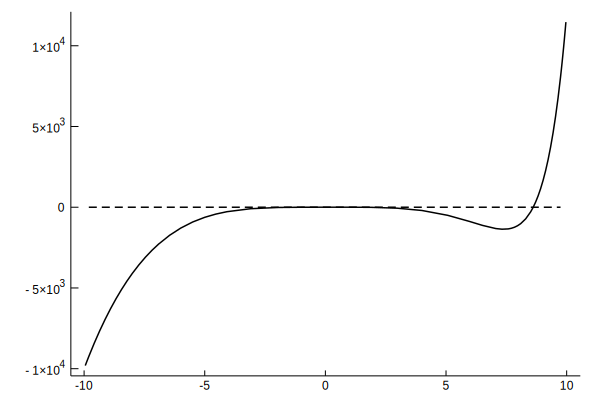

In [377]:
f(x) = exp(x) - x^4
bound = 10
plot(f,-bound,bound,label="",color="black",lw=1.5,grid=false)
plot!(zero,-bound,bound,label="",color="black",lw=1.5,grid=false,linestyle=:dash)

### Finding zeros using ${\tt sm}$ function:

In [378]:
ansArr = sm(7.9,8.0,f,30)
println(ansArr, "\n\n", "Eval. at zero found:\n", f(ansArr[end]))

Any[9.34856, 8.30321, 8.46741, 8.65636, 8.60804, 8.613, 8.61317, 8.61317, 8.61317, 8.61317, 8.61317]

Eval. at zero found:
1.8189894035458565e-12


## Function 3 (Newton Baffler): 
Let $m=1$, $b=\frac{1}{2}$

$
f(x) = \left\{
        \begin{array}{ll}
            2mx & \quad -b < x < b \\
            2mb + m(x-b)& \quad x > b \\
            -2mb + m(x+b) & \quad x < -b
        \end{array}
    \right.
$


$x_0,x_1 = (-1,\frac{3}{4})$

Plotted below:

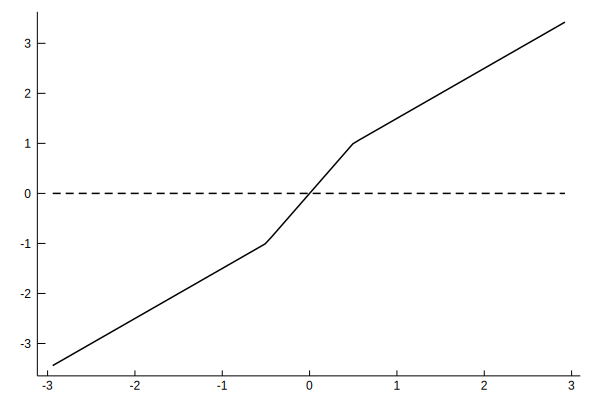

In [379]:
function nBaffler(x, m = 1, b = 1/2)
    if(-b<x<b) return 2*m*x end
    if(x>b) return 2*m*b + m*(x-b) end
    if(x<-b) return -2*m*b + m*(x+b) end
end

bound = 3
plot(nBaffler,-bound,bound,label="",color="black",lw=1.5,grid=false)
plot!(zero,-bound,bound,label="",color="black",lw=1.5,grid=false,linestyle=:dash)

### Finding zeros using ${\tt sm}$ function:

In [380]:
sm(-1,3/4,nBaffler,30)

4-element Array{Any,1}:
 -0.0454545 
  0.00847458
  0.0       
  0.0       